In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
x = df.iloc[:,2:4].values
y = df.iloc[:,4].values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
ypred = classifier.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=ypred,y_true=y_test)
print(cm)

[[62  6]
 [ 3 29]]


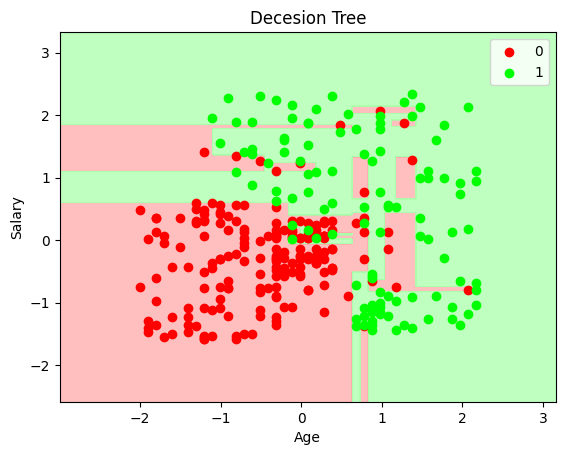

In [17]:
# Visualizing the results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
cmap_fill = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_markers = ListedColormap(['#FF0000', '#00FF00'])
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap=cmap_fill)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c=[cmap_markers(i)], label=j)
plt.title("Decesion Tree")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

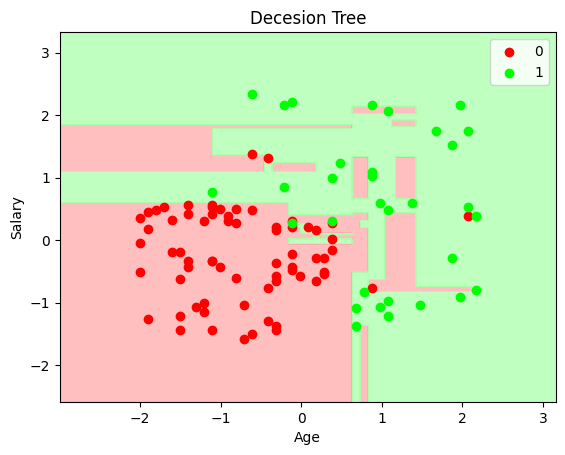

In [18]:
# Visualizing the results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
cmap_fill = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_markers = ListedColormap(['#FF0000', '#00FF00'])
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap=cmap_fill)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c=[cmap_markers(i)], label=j)
plt.title("Decesion Tree")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()